#Load in Files

### Imports

In [37]:
spark.version

u'2.2.0'

In [1]:
import re
import datetime
from pyspark.sql.functions import *
import pandas as pd
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 35)


import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

### Load In NBA Score Data Set

In [2]:
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType,DateType

cleaned_dir = '/data2/nba-rt-prediction/sparkfiles/cleanedDF'
df = spark.read.format('csv')\
                    .option("header", "true")\
                    .option("inferSchema", "true")\
                    .option("dateFormat", "yyyy-MM-dd")\
                    .load(cleaned_dir).coalesce(2)

# Here use Pandas Dataframes as visualization needs to run in the driver
# downsample if necessary
visdf = df.toPandas()
visdf[0:9]

,dateOrig,ts,away_team_full,away_score,home_team_full,home_score,timestring,timeleft,gameid,away_team,home_team,score_diff_amh,date,time_elasped,scorediff_div_time,away_team_spread,overunder,away_team_ml,home_team_ml,dateStr,final_away_score,final_home_score,away_win,key
0,2016-04-13,23:02:47,Atlanta,98,Washington,109,(0:00 IN 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
1,2016-04-13,23:02:16,Atlanta,98,Washington,109,(END OF 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
2,2016-04-13,23:01:15,Atlanta,98,Washington,109,(0:00 IN 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
3,2016-04-13,23:00:45,Atlanta,98,Washington,109,(END OF 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
4,2016-04-13,23:00:15,Atlanta,98,Washington,109,(0:00 IN 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
5,2016-04-13,22:59:44,Atlanta,98,Washington,109,(END OF 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
6,2016-04-13,22:58:13,Atlanta,98,Washington,109,(0:00 IN 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
7,2016-04-13,22:57:12,Atlanta,98,Washington,109,(END OF 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None
8,2016-04-13,22:56:42,Atlanta,98,Washington,109,(0:00 IN 4TH),0,400829108,atl,wsh,-11,2016-04-13,48,-11,-7.5,209,-330,270,2016-04-13,98,109,0,None


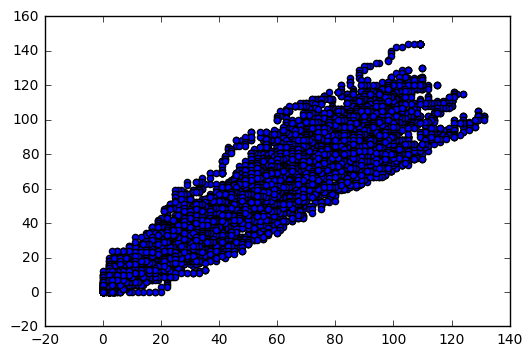

In [3]:
### Show the average number of points per game in a histogram
#visdf.describe()

plt.scatter(visdf["away_score"].values,visdf["home_score"].values)
plt.show()
#plt.scatter(visdf["away_score"].values,visdf["time_elapsed"].values)
#plt.show()

In [4]:
a = visdf.groupby("key").agg(['count']).ts
plt.hist(a.values)

In [ ]:
plt.hist(a.values)

In [ ]:
rtscoresAndFinalDF.filter(rtscoresAndFinalDF.timestring.contains("FINAL")).show(5)
rtscoresAndFinalDF.filter(rtscoresAndFinalDF.timestring.contains("1ST")).show(5)

In [10]:
import glob
def echo_ex(key_in) : 
    base_dir = "/data2/nba-rt-prediction/sparkfiles/cleanedDF/key="+key_in
    file = glob.glob(base_dir + '/*.csv')
    print file[0]
    #tdf = df.filter(col("key") == value)
    f = open(file[0], 'r')
    rv = []
    for line in f:
        lineary = line.split(",")
        #print str(lineary)
        rv.append(lineary)
    #rv = tdf.count()
    return rv    
    #return "Here it is " + key_in + " "+ str(rv)


b=echo_ex("2016-04-05.chi.mem")


/data2/nba-rt-prediction/sparkfiles/cleanedDF/key=2016-04-05.chi.mem/part-00000-dedbaf1f-90af-4d54-984d-a913850af01b.c000.csv


In [18]:
b = b[1:-1]
b.sort(key=lambda x : float(x[13]))

print b[0]
for i in b :
    print i[3] + " " + i[5]

['2016-04-05', '20:10:44', 'Chicago', '0', 'Memphis', '0', '(12:00 IN 1ST)', '48.0', '400829045', 'chi', 'mem', '0', '2016-04-05', '0.0', '0.0', '-3.0', '201.5', '-150.0', '130.0', '2016-04-05', '92', '108', '0.0\n']
0 0
0 0
0 0
21 23
0 0
0 0
0 0
0 0
0 2
2 2
2 2
4 4
4 4
4 6
4 5
4 4
4 6
4 6
4 6
4 6
4 6
4 6
4 8
4 8
7 8
8 8
7 8
9 8
9 8
9 8
9 10
11 11
11 10
11 12
13 12
13 12
13 12
13 12
13 12
13 14
13 14
13 16
16 20
18 20
18 22
21 22
21 23
21 23
21 23
21 25
44 54
21 26
21 28
21 28
21 28
23 28
23 30
26 30
26 32
28 32
28 32
30 32
30 34
30 33
30 32
30 34
30 34
30 34
30 34
30 39
30 39
33 39
33 39
33 41
33 43
35 43
36 45
35 45
36 45
36 48
38 48
38 50
38 50
38 50
38 50
38 50
65 83
44 54
65 83
46 55
46 54
48 55
48 57
48 57
48 59
48 59
50 60
50 59
49 59
48 59
50 61
52 64
52 66
54 66
54 66
54 66
54 69
54 69
56 71
56 74
56 74
58 76
58 76
61 79
61 81
61 81
61 83
61 83
64 83
65 83
65 83
65 83
68 85
68 88
68 87
68 89
68 89
69 89
68 89
70 89
70 91
70 90
73 91
73 91
75 91
77 91
80 91
80 93
81 93
80 93
82

In [33]:
a = '47.5'
float(a)

47.5

In [21]:
#df.select(["key"]).show()
#df.filter(col("key") == "2016-04-19.mem.san").select("timeleft").show()

#df.rdd.take(5)

#df.rdd.map(lambda x : (x[0],x[0:3])).take(5)
#df.rdd.map(lambda x : (x["key"],x[0:3])).take(5)


a=df.rdd.map(lambda x : (x["key"],x[0:3]))

b=a.reduceByKey(lambda x,y : x).keys()
b.map(lambda x : echo_ex(x)).take(2)

[[['2016-04-11',
   '21:12:49',
   'Milwaukee',
   '98',
   'Orlando',
   '107',
   '(0:00 IN 4TH)',
   '0.0',
   '400829091',
   'mil',
   'orl',
   '-9',
   '2016-04-11',
   '48.0',
   '-9.0',
   '4.0',
   '210.5',
   '155.0',
   '-175.0',
   '2016-04-11',
   '2016-04-11.mil.orl',
   '98',
   '107',
   '0.0\n'],
  ['2016-04-11',
   '21:12:19',
   'Milwaukee',
   '98',
   'Orlando',
   '107',
   '(0:19 IN 4TH)',
   '0.316666666667',
   '400829091',
   'mil',
   'orl',
   '-9',
   '2016-04-11',
   '47.683333333333',
   '-7.042147167922127',
   '4.0',
   '210.5',
   '155.0',
   '-175.0',
   '2016-04-11',
   '2016-04-11.mil.orl',
   '98',
   '107',
   '0.0\n'],
  ['2016-04-11',
   '21:11:48',
   'Milwaukee',
   '98',
   'Orlando',
   '106',
   '(0:31 IN 4TH)',
   '0.516666666667',
   '400829091',
   'mil',
   'orl',
   '-8',
   '2016-04-11',
   '47.483333333333',
   '-5.610294986545293',
   '4.0',
   '210.5',
   '155.0',
   '-175.0',
   '2016-04-11',
   '2016-04-11.mil.orl',
   '98',
   

### UDFs For Creating Extra Columns In Real Time Data Frame

In [ ]:
# Create new team name column.. do simple lookup conversion with a UDF
def mapper(teamin) :
    return teamMap[teamin]

mapperudf = udf(mapper)


In [ ]:
# Date Logic to adjust for games that finish on the day after .... 
# This is so that I can join them against the spread which was dated the day prior...
# This is due to not having a great key to join my tables ...

datecrossregex = re.compile("^0[0-3]") # midnight to 3am
def dateadjust(datein, tsin ) : 
    #dateary = datein.split("-")
    tsary   = tsin.split(":")
    sub_one_day = datetime.timedelta(days=1)
    newdate = datein
    if datecrossregex.match(tsary[0]) :
        #day = "%02d".format(int(dateary[2]) -1)
        #newdate = dateary(0) + "-" + dateary(1) + "-" + day   
        newdate = datein - sub_one_day
    return str(newdate)

dateadjustudf = udf(dateadjust)


# UDFs to create some extra features ... this one is for an experiemental combination of Time left and Score difference.  
# Made this via intuition.  This can be extended to add other custom features
import math
def scoredivtimeXform(numerator, denominator):
    rv = numerator/(math.pow(denominator+1,0.5))
    return rv
scoredivtimeUdf = udf(scoredivtimeXform)


### Wrangle The Real Time And Final Score Data.  Add Columns To The Data Set

In [ ]:
# Remove Overtime games from this analysis
rtscoresAndFinalDF = rtscoresAndFinalDF.filter(~col("timestring").like("%OT%"))
# Create short 3 character team names 
rtscoresAndFinalDF = rtscoresAndFinalDF.withColumn("teama", mapperudf(col("teamlonga")))
rtscoresAndFinalDF = rtscoresAndFinalDF.withColumn("teamb", mapperudf(col("teamlongb")))



In [ ]:
# Add a score differential Column 
rtscoresAndFinalDF = rtscoresAndFinalDF.withColumn("scorea-scoreb", col("scorea") - col("scoreb"))

# Transform the Date.  This is for games that spanned multiple days and gave me a headache.  
# Games adjusted to the day they started on.
rtscoresAndFinalDF = rtscoresAndFinalDF.withColumn("date",  dateadjustudf(col("dateOrig"),col("ts")))

# Create a Key for me to use to join with my odds data later.  Key = date.teama.teamb
rtscoresAndFinalDF = rtscoresAndFinalDF.withColumn("key", concat(col("date"),lit("."),col("teama"),lit("."),col("teamb")))


In [ ]:
rtscoresAndFinalDF.show()


### Separate The Real Time And Final Data From One Common Dataframe To Two Dataframes

In [ ]:
# Currently based on the way the data was sampled, both real time scores and final scores are written as seperate records to the same file.  I need to pull these apart, and then join the dataframes so that I have a real time score and features, and know if the game was won or lost ....

# Create Final Score DF
# Note a shortcut for repeating the dataframe within the filter is to use a $   df.filter(df("foo").contains ... is equiv to df.filter($"foo".contains)

finalscoresDF = rtscoresAndFinalDF.filter(col("timestring").like("%FINAL%"))

# Rename some columns so that join later doesnt have name overlaps
finalscoresDF = finalscoresDF.withColumnRenamed("scorea", "fscorea")
finalscoresDF = finalscoresDF.withColumnRenamed("scoreb", "fscoreb")

# Create final score difference
finalscoresDF = finalscoresDF.withColumn("fscorea-fscoreb", col("fscorea") - col("fscoreb"))

# Add a Win/loss column Win = 1, Loss = 0
finalscoresDF = finalscoresDF.withColumn("win-loss-enc", (when(col("fscorea-fscoreb") > 0.0, 1.0).otherwise(0)))

#(when(df['age'] == 2, 3).otherwise(4)

# Remove Halftime records as this particular case isn't handled well... (for now)
rtscoresDF = rtscoresAndFinalDF.filter(~col("timestring").like("%FINAL%")).filter(~col("timestring").like("HALFTIME"))

# Create final score difference
rtscoresDF = rtscoresDF.withColumn("scorea-scoreb", col("scorea") - col("scoreb"))

# Create a unique feature based on my custom UDF.  Idea here is that I have intuition that timeleft and score difference are a strong predictor when combined
rtscoresDF = rtscoresDF.withColumn("score-div-time", scoredivtimeUdf(col("scorea") - col("scoreb"), col("timeleft")*2))


### Lets Take A Look Of What We Have For The Two Dataframes We Just Wrangled

In [ ]:
# Some Printouts .....
print("final scores data frame")
finalscoresDF.show(5)
print("real time scores data frame")
rtscoresDF.show(5)
finalscoresDF.printSchema


print "##########################################"
print "Total Data Points in rtscoresDF = {0}".format(rtscoresDF.count())
print "Total Data Points in rtscoresDF uniq = {0}".format(rtscoresDF.sort("key").distinct().count())
print "Total Data Points in finalscoresDF = {0}".format(finalscoresDF.count())
print "##########################################"




### Interpret the Odds data
````How to interpret the odds data ...
Example Golden State -12.5 O (207.0) -125.0 | Detroit 12.5 U (207.0) 145.0
Here Golden State the away team is a 12.5 pt favorite to win.  The over under is in parentheses (207) and is the 50/50 line between teams sum of scores
being above/below that line.  
Finally the -125 / +145 numbers are whats known at the moneyline odds. 
    A negative number means you need to bet 125$ to get a 100$ payout
    A positive number means you need to bet 100$ to get a 145$ payout
```

### Load In Odds Data

In [ ]:
# Here, the data is very raw, and needs to be pre-processed .  I will start by loading it as an RDD and perform a lot of transformations.  Once I have it properly parsed, I will convert to a dataframe.
# This is not beautiful, but gets the job done
# Data format .....
#       <title>New Orleans 2.5 O (207.0) 125.0 | Phila. -2.5 U (207.0) -145.0 (Apr 05, 2016 07:10 PM)</title>
#       <title>Detroit 4.0 O (202.0) 160.0 | Miami -4.0 U (202.0) -190.0 (Apr 05, 2016 08:05 PM)</title>
oddsfile = "/data2/nba-rt-prediction/nbaodds_042516.xml"

# Reading the data in as an RDD first.  There isn't a dataframe parser for this XML I have, so I will write a custom parser ....
oddsrdd = spark.read.text(oddsfile).rdd
# just grabbing the text within the < ... > tags.  I can do this, because the format is super simple and not nested
# the subscript [0] is due to the fact that spark.read.text read in the oddsfile of Type Row.  Need to index
# into it to get the string
gameStringRdd = oddsrdd.map(lambda x : x[0][x[0].find('>')+1:x[0].rfind('<')])


In [ ]:
#oddsrdd.map(lambda x : x[0].find('>')).take(2)
#gameStringRdd.take(2)

In [ ]:
# This is where I do the heavy lifting of parsing my XML .. and then finally convert my RDD to a dataframe .....
# just lots of string parsing and data type conversions
def parseOdds(line_in) : 
    away_str = line_in[0:line_in.find('|')]  
    home_and_date_str = line_in[line_in.find('|')+2:-1]
    home_str = home_and_date_str[0:home_and_date_str.rfind('(')]
    date_str = home_and_date_str[home_and_date_str.rfind('(')+1:len(home_and_date_str)]
    date_str = date_str.replace(',', '')
    
    # parse away string
    overunder = away_str[away_str.find('(')+1:away_str.find(')')]
    teamaml = away_str[away_str.find(')')+2:len(away_str)-1]
    away_str_2 = away_str[0:away_str.find('(')-3]
    teamaspread = away_str_2[away_str_2.rfind(' ')+1:len(away_str_2)]
    teamlonga = away_str_2[0:away_str_2.rfind(' ')]
    teama = teamMap[teamlonga]
    
     # parse home string
    overunder = home_str[home_str.find('(')+1:home_str.find(')')]
    teamhml = home_str[home_str.find(')')+2:len(home_str)-1]
    home_str_2 = home_str[0:home_str.find('(')-3]
    teamhspread = home_str_2[home_str_2.rfind(' ')+1:len(home_str_2)]
    teamlongh = home_str_2[0:home_str_2.rfind(' ')]
    teamh = teamMap[teamlongh]
   
    # parse date string
    dateInfo = date_str.split(' ')
    dateStr = dateInfo[2] + "-" + monthMap[dateInfo[0]] + "-" + dateInfo[1]
    # This will become my join key for the other data sets
    key = dateStr +"." + teama + "." + teamh
    return (key,teamlonga,teama,teamaspread,overunder,teamaml,teamlongh,teamh,teamhml,dateStr)

#def parseOdds(line_in) : 
#    away_str = line_in[0:line_in.find('|')]  
#    return (away_str,away_str)


oddsDF = gameStringRdd.map(lambda x : parseOdds(x))\
        .toDF(["key","teamlonga","teama","teamaspread","overunder","teamaml","teamlongh","teamh","teamhml","dateStr"]).distinct()

# OddsDF has some dups due to the fact that I have multiple readings ...
oddsDF.registerTempTable("odds_table")

oddsDF = spark.sql("SELECT key, FIRST(teamlonga) as teamlonga, FIRST(teama) as teama,\
  AVG(teamaspread) as teamaspread, AVG(overunder) as overunder, AVG(teamaml) as teamaml,\
  FIRST(teamlongh) as teamlongh,FIRST(teamh) as teamh,AVG(teamhml) as teamhml, FIRST(dateStr) as dateStr FROM odds_table GROUP BY key")


In [ ]:
#oddsrdd.take(2)
#gameStringRdd.take(2)
print oddsDF.count()
oddsDF.show()
oddsDF.printSchema

### Inspect Some Of The Odds Data

In [ ]:
oddsDF.show(5)
print "Total Home Teams      = {0}".format(oddsDF.select("teamh").distinct().count())
print "Total Away Teams      = {0}".format(oddsDF.select("teama").distinct().count())
print "Total Games Collected = {0} ".format(oddsDF.count())


### Join The Odds And Final Score Data Sets

In [ ]:
# Here is where we join the Odds/Realtime scores/ Final Scores into one wholistic data set as input for Logistic Machine Learning

# Create a smaller Final Score Dataframe.  Just keep the key, final score a and b, the win/loss indicator
finalslicedscoresDF1 = finalscoresDF.select(["key","fscorea","fscoreb","win-loss-enc"]).distinct()
# First Join the 2 smallest data frames ... odd and final.
gameDF = oddsDF.join(finalslicedscoresDF1, oddsDF["key"] == finalslicedscoresDF1["key"], "inner").drop(oddsDF["key"])
# Drop these redundant columns prior to joining with Realtime score dataframe
gameDF = gameDF.drop("teamlonga")
gameDF = gameDF.drop("teamlongb")
gameDF = gameDF.drop("teama")
gameDF = gameDF.drop("teamb")

In [ ]:
# Print Out the Game Dataframe ... notice we have the odds data merged with the win loss data ....
#print("gameDF")
#gameDF.sort(["key"]).show(152)
print "Total finalscoresDF = {0}".format(finalscoresDF.count())
print "Total oddsDF = {0}".format(oddsDF.count())
print "Total Games after joining odds and score data = {0}".format(gameDF.count())

#gameDF.select("key").sort(["key"]).show(144)

finalscoresDF.filter(col("key") == "2016-04-24.gst.hou").show()
oddsDF.filter(col("key") == "2016-04-24.gst.hou").show()


### Join The Game Dataframe With The Real Time Score Dataframe

In [ ]:
lrDF = rtscoresDF.join(gameDF, rtscoresDF["key"] == gameDF["key"], "inner").drop(gameDF["key"])
print("lrDF : Logistic Regression Data Frame")
lrDF.show(3)
print "Total Data Points in rtscoresDF = {0}".format(rtscoresDF.count())
print "Total Data Points in gameDF = {0}".format(gameDF.count())
print "Total Data Points in joined lrDF = {0}".format(lrDF.count())



###Lets Look At Some Stats From 'Unpacked' Logistic Regression Dataframe

In [ ]:
 lrDF.describe().show()

###'Pack' Logistic Dataframe Into Required Format For Logistic Regression [R] - Creating A Simple/Complex Dataframe For Comparison

In [ ]:
# Logistic regression requires that
# The best way I found to modify data in a custom way is with map, however it returns an RDD, so you will need to run toDF at the end
# Logistic DF requires a DF of type  => [label: double, features: vector]

import org.apache.spark.sql._
# These is a helper function that converts an 'Any(Int)' type to a Double or Any(Double) to a Double
val ai2d : (Any => Double) = (in:Any) => in.asInstanceOf[java.lang.Integer].doubleValue
val ad2d : (Any => Double) = (in:Any) => in.asInstanceOf[java.lang.Double]

var nbaSimpleLrDF = lrDF.map {
    dfrow => {
    # get the indexes ... prob should move this out of the looop!
      val tgt = ad2d( dfrow(dfrow.fieldIndex("win-loss-enc")))
      val f1  = ai2d( dfrow(dfrow.fieldIndex("scorea-scoreb")))
      val f2 =  ad2d( dfrow(dfrow.fieldIndex("timeleft")))
      LabeledPoint(tgt,Vectors.dense(f1,f2))
    }
}.toDF("label","features")

var nbaComplexLrDF = lrDF.map {
    dfrow => {
    # get the indexes ... prob should move this out of the looop!
      val tgt = ad2d( dfrow(dfrow.fieldIndex("win-loss-enc")))
      val f1  = ai2d( dfrow(dfrow.fieldIndex("scorea-scoreb")))
      val f2  = ad2d( dfrow(dfrow.fieldIndex("teamaspread")))
      val f3  = ad2d( dfrow(dfrow.fieldIndex("overunder")))
      val f4  = ad2d( dfrow(dfrow.fieldIndex("teamaml")))
      val f5 =  ad2d( dfrow(dfrow.fieldIndex("timeleft")))
      // Add a new feature that weight point differential more as time left gets smaller...
      // I played around with excel and this looked ok ....
      val f6  = ad2d( dfrow(dfrow.fieldIndex("score-div-time")))
      LabeledPoint(tgt,Vectors.dense(f1,f2,f3,f4,f5,f6))
    }
}.toDF("label","features")


nbaSimpleLrDF.show(3)
nbaComplexLrDF.show(3)

### Function to Create The Model And Train It And Test It 

In [ ]:
def trainAndTest( indf : org.apache.spark.sql.DataFrame, modelPath : String ) : (org.apache.spark.sql.DataFrame, org.apache.spark.ml.classification.LogisticRegressionModel)  = {
    val splits = indf.randomSplit(Array(0.60,0.39,0.01), seed = 11L)
    val trainingdf = splits(0).cache()
    val testdf = splits(1).cache()
    val crossvaldf = splits(2).cache()
    
    println("Tranining Samples = " + trainingdf.count())
    println("Test      Samples = " + testdf.count())
    println("Cross Val Samples = " + crossvaldf.count())
    
    # Setup some of the configurations for the Logistic regression model ..
    # Here we could try a pipeline with params to select the 'best setting' but in the interest of time will go with this
    val lr = new LogisticRegression()
      .setMaxIter(50)
    .setRegParam(0.10)
    .setElasticNetParam(0.0)

    # Fit the model
    val lrModel   = lr.fit(trainingdf)

    println("Reg Parameter:    =" + lrModel.getRegParam)
    println("lrModel.intercept = " + lrModel.intercept)
    println("lrModel.weights   = " + lrModel.weights)

    # Save the model for later use ....
    # Argh ! -> in 1.6.1 api, but not 1.5.2 :(  
    # lrModel.save("modelPath" )
    
    ####  Create a logistic regression summary object ////
    # val lrSummary = lrModel.summary
    # println("lrSummary.objectiveHistory = " + lrSummary.objectiveHistory.length)
    # println(lrSummary.objectiveHistory.deep.mkString("\n"))
    ####
    
    # transform is now used in lieu of predict from mllib.  Found this after studying the API for a while
    val predictions = lrModel.transform(testdf)

    # Select (prediction, true label) and compute test error
    val evaluator = new MulticlassClassificationEvaluator()
      .setLabelCol("label")
      .setPredictionCol("prediction")
      .setMetricName("precision")
    
    val accuracy = evaluator.evaluate(predictions)
    println("Test Error = " + (1.0 - accuracy))

    # return the 
    (predictions,lrModel)
}

### Test And Train Multiple Models

In [ ]:
def time[R](block: => R): R = {
  val t0 = System.nanoTime()
  val result = block
  println("Elapsed time: " + (System.nanoTime - t0) + "ns")
  result
 }
 
val (simplePredictionDF, simpleModel)   = trainAndTest(nbaSimpleLrDF, "/data/resources/nbaSimpleModel")
val (complexPredictionDF, complexModel) = trainAndTest(nbaComplexLrDF, "/data/resources/nbaComplexModel")


In [ ]:
complexPredictionDF.show(5)

### Helper To Unpack MLLIB Label and Features Vector Into A Standard Dataframe

In [ ]:
// The whole point to doing this is so that I can visualize the features and the outcomes.  Zeppelin cannot render the Vector type well at all, so converting the data back to a flattened style of layout
// Expect a column name to be passed that is the features vector, all other columns should come back as-is
// I could extend the MLLIB DF to do this !! and  do it



 // Create a Row from values.
// Row(value1, value2, value3, ...)
 // Create a Row from a Seq of values.
// Row.fromSeq(Seq(value1, value2, ...))

// Goal of this function to return a new flattened data frame with the Vector datatype replaced with multiple columns.  This
// is done so that I can use zeppelin to graph my data since it doesnt really handle vectors well for graphing.
// not super flexible as of now, but someday might make it better ...

def convertVectorDF (indf : org.apache.spark.sql.DataFrame, labelIndex : Int, featureIndex : Int, probIndex : Int, predictionIndex : Int) = {

    //indf.select(colname).show(5)
    val myCols = indf.columns
    
    // debug stuff
    println("featureIndex value = " + myCols(featureIndex))
    println("probIndex value = " + myCols(probIndex))
    println("predictionIndex value = " + myCols(predictionIndex))
    
    if(myCols(labelIndex) != "label") {
        println("labelIndex value = " + myCols(labelIndex))
        println("Error")
    }
    
    
    println(" myCols.length = " + myCols.length)
    //println("Vector Size = " + indf[0].features)
    indf.show(3)
    
    // build an RDD of sql Rows here, then use toDF to convert back to a Dataframe..
    val tmprdd = indf.map { line => 
        var reind = 0
        var newRow : Seq[Double]= Seq(line(labelIndex).asInstanceOf[Double])
        var labeledPointVector = line(featureIndex).asInstanceOf[org.apache.spark.mllib.linalg.Vector]
        for(i <- 0 to labeledPointVector.size -1 ) {
            newRow = newRow :+ labeledPointVector(i).asInstanceOf[Double]
        }
        var probArray = line(probIndex).asInstanceOf[org.apache.spark.mllib.linalg.Vector]
        newRow = newRow :+ probArray(0).asInstanceOf[Double]
        newRow = newRow :+ line(predictionIndex).asInstanceOf[Double]
        //  https://spark.apache.org/docs/1.4.0/api/java/org/apache/spark/sql/Row.html see example where 
        //  Row.fromSeq is used to make a Row
        Row.fromSeq(newRow)
    }
    //http://spark.apache.org/docs/latest/sql-programming-guide.html#programmatically-specifying-the-schema
    //val schema =
      // StructType(
      // schemaString.split(" ").map(fieldName => StructField(fieldName, StringType, true)))
    //tmprdd
    //https://spark.apache.org/docs/1.6.1/api/java/org/apache/spark/sql/types/StructType.html

    // Take the first row. Each row just has a single 'Row' object at position 0
    val numCols = tmprdd.take(1)(0).length
   //val struct =
    //StructType(
     //StructField("label", IntegerType, true) ::
     //StructField("f1", LongType, false) ::
     //StructField("c", BooleanType, false) :: Nil)
     //sqlContext.createDataFrame(tmprdd,schema)
    var schemaString = myCols(labelIndex);
    for(i <-0 to numCols - 4){
        schemaString = schemaString + ",f" +i 
    }
    schemaString = schemaString + "," + myCols(probIndex);
    schemaString = schemaString + "," + myCols(predictionIndex);
    
    //schemaString = schemaString + tmprdd.take(1)(0).toString
    println(schemaString)
    val schema  = StructType(schemaString.split(",").map(fieldName => StructField(fieldName,DoubleType,true)))
    val finalDF = sqlContext.createDataFrame(tmprdd, schema)
    finalDF
}


###Lets Publish The Model and Analysis And Vizualize In Jupyter ....

In [ ]:
var simpleUnpackedPredictionDF = convertVectorDF(simplePredictionDF,0,1,3,4)
simpleUnpackedPredictionDF = simpleUnpackedPredictionDF.withColumn("correct", when($"label" === $"prediction",1).otherwise(0))

//var complexUnpackedPredictionDF = convertVectorDF(complexPredictionDF,0,1,3,4)
//complexPredictionDF = complexPredictionDF.withColumn("correct", when($"label" === $"prediction",1).otherwise(0))

simpleUnpackedPredictionDF.write.format("json").save("swift://notebooks.spark/test/simple001.json")




In [ ]:
simpleUnpackedPredictionDF.count()

In [ ]:
%AddJar https://github.com/dustinvanstee/random-public-files/raw/master/SystemML.jar
import org.apache.sysml.api.MLContext

In [ ]:
import org.apache.sysml.api.MLContext